In [31]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)


seed_everything(42)

df_train = pd.read_csv("../data/preprocessed/df_train001.csv")
df = pd.read_csv("../data/preprocessed/df.csv")

---

In [32]:
df_train.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.0,68.3,1.7,6.7,11.933,48.699342,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,11.933,48.699342,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,11.933,48.699342,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,11.933,48.699342,7.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,11.933,48.699342,-4.6


In [33]:
df_train['년'] = np.float64(df_train['일시'].str.split('-', expand=True)[0])
df_train['월'] = np.float64(df_train['일시'].str.split('-', expand=True)[1])
df_train['일'] = np.float64(df_train['일시'].str.split('-', expand=True)[2])

In [34]:
df['년'] = np.float64(df['일시'].str.split('-', expand=True)[0])
df['월'] = np.float64(df['일시'].str.split('-', expand=True)[1])
df['일'] = np.float64(df['일시'].str.split('-', expand=True)[2])

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X = df_train.drop(columns=['일시','평균기온'], axis=1)
y = df_train['평균기온']

In [48]:
X = scaler.fit_transform(X)

---

In [49]:
import statsmodels.api as sm

In [15]:
# ARIMAX 모델 생성
order = (1, 0, 1)  # ARIMA(p, d, q)의 각각의 차수를 지정

In [50]:
model = sm.tsa.ARIMA(endog=y, order=order, exog=X)

In [51]:
# 모델 피팅
results = model.fit()

---

In [57]:
sub_file = pd.read_csv("../data/original/sample_submission.csv")

In [59]:
len(sub_file)

358

In [60]:
# 예측
forecast_steps = 358  # 예측할 스텝 수를 지정
forecast = results.get_forecast(steps=forecast_steps, exog=X[-forecast_steps:])

In [65]:
sub_file['평균기온'] = forecast.predicted_mean.values

<AxesSubplot:>

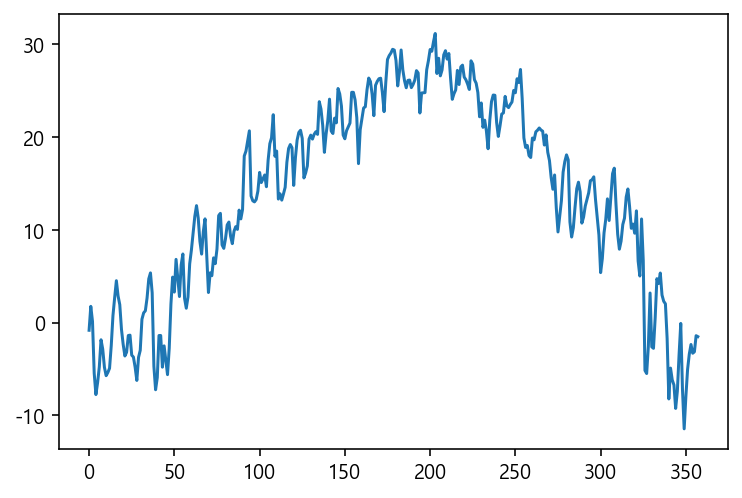

In [68]:
sub_file['평균기온'].plot()

In [69]:
sub_file.to_csv("../data/sub/041_df_ARIMAX_001.csv",
                index=False, encoding='utf-8')

---

In [70]:
import joblib

In [71]:
joblib.dump(model, '../model/ARIMAX_001.pkl')

['../model/ARIMAX_001.pkl']

In [72]:
loaded_model = joblib.load('../model/ARIMAX_001.pkl')